# TASK 1 - Preguntas Teóricas

**1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque**
- _Descenso de gradiente:_ Es un algoritmo de optimización el cual calcula la gradiente en función de pérdida con respecto a parámetros del modelo utilizando todo el conjunto de datos de entrenamiento. Posteriormente se actualizan los parámetros en dirección opuesta al gradiente para que se pueda minimizar la pérdida.

    _Ventajas:_
    - Se aprovecha la eficiencia de las operaciones vectorizadas en hardware moderno
    - Puede converger a la solución global en problemas convexos

    _Desventajas:_
    - Requiere que el conjunto de datos esté presente en memoria, teniendo una impracticidad con conjuntos de datos grandes.
    - La actualización de parámetros ocurre luego de procesar todo el conjunto de datos, teniendo un costo computacional alto.

- _Descenso de gradiente por mini batches:_ Esta variante del descenso de gradiente divide el conjunto de datos de entrenamiento en batches mucho más pequeños para calcular la gradiente de cada lote, actualizando los parámetros del modelo luego de cada mini batch.

    _Ventajas:_
    - Aprovecha la eficiencia de operaciones vectorizadas.
    - Maneja conjuntos de datos más grandes.
    - Utiliza la paralelización y se beneficia de ella y de la aceleración de hardware moderno.

    _Desventajas:_
    - Puede no converger tan rápidamente
    - Requiere ajuste de hiperparámetros como el tamaño del mini lote 

- _Descenso de gradiente estocástico:_ Esta versión resulta mucho más eficiente que el algoritmo de descenso de gradiente por mini batches pues, en lugar de utilizar lotes predefinidos, este selecciona un ejemplo de entrenamiento de modo aleatorio en cada iteración, con el cual se le calcula el gradiente y se actualizan los parámetros del modelo.

    _Ventajas:_
    - Puede converger rápidamente en problemas no convexos y no estacionarios
    - Utiliza una menor carga computacional por iteración

    _Desventajas:_
    - Tiene una mayor viabilidad en las actualizaciones de parámetros debido a la aleatoriedad de la selección de batches
    - No aprovecha completamente la eficiencia de las operaciones vectorizadas

**2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada**

Definiendo la extracción de features como la transformación de los datos originales en un nuevo conjunto de características, generalmente más pequeño y más significativo, y la selección de features como elegir un subconjunto de las características originales para luego eliminar aquellas que se consideran mejor importantes o redundantes. Ambas técnicas buscan mejorar el rendimiento de modelos y la eficiencia computación de ellos, mediante la reducción de la dimensionalidad. 

Sin embargo, la extracción de features crea nuevas representaciones, mientras que la selección únicamente elige subconjuntos de los datos originales. Por último, vale la pena resaltar que la extracción puede ser más adecuada para capturar información más compleja y abstracta, mientras que la selección se prefiere cuando la interpretación de las características es crucial o se desea mantener la integridad de las características originales.

**3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros**

Este tipo de red neuronal consta únicamente por una capa de entrada y una de salida, el cual es comúnmente utilizado para problemas de clasificación binaria linealmente separables. Su arquitectura está dividida en la capa de entrada y la de salida, donde la capa de entrada consta de nodos que representan características de la entrada del problema y cada nodo está conectado a los demás mediante un peso asociado. Por su parte, la capa de salida consiste en un único nodo que es producido por la salida de la red.

Por otro lado, el funcionamiento de esta red está dividido en la inicialización, donde se asignan pesos aleatorios o predefinidos a las conexiones de los nodos, la propagación hacia adelante, la cual calcula la salida el perceptrón mediante la suma del producto de cada entrada con su respectivo peso, el cálculo de error, donde se compara la salida obtenida con la deseada, la actualización de pesos, donde estos se actualizan de acuerdo con la regla de aprendizaje del perceptrón para reducir el error, y la iteración, que es donde los pasos anteriores se repiten para cada muestra de entrenamiento hasta que el error se considera aceptable o hasta que se alcance el número de iteraciones predefinido.

## TASK 2 - Ejercicios prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Descenso de gradiente

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
def gradientDescent(X, Y, theta, alpha, numIterations):
    Xtrans = X.transpose()
    numPoints = len(Y)
    
    start_time = time.time()  # Guardar tiempo de inicio
    for i in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - Y

        cst = np.sum(loss ** 2) / (2 * numPoints)
        print("Iteration %d | Cost: %f" % (i, cst))
        
        gradient = np.dot(Xtrans, loss) / numPoints
        theta = theta - alpha * gradient

        alpha = alpha / (1 + i)

        print("Theta en la iteración %d:" % i, theta)
        print("Gradiente en la iteración %d:" % i, gradient)
        
    end_time = time.time()  # Guardar tiempo de fin
    
    print("Parámetros finales del modelo:", theta)
    execution_time = end_time - start_time  # Calcular tiempo de ejecución
    print("Tiempo de ejecución:", execution_time, "segundos")
    
    return theta

def genData(numPoints, bias, variance):
    X = np.zeros(shape=(numPoints, 2))
    Y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        X[i][0] = 1  # Bias term
        X[i][1] = i
        Y[i] = 2 * i**3 - 3 * i**2 + 5 * i + 3 + np.random.uniform(0, variance)
    return X, Y

numPoints = 90
X, Y = genData(numPoints, 20, 9)

a, b = np.shape(X)

numIterations = 1000
alpha = 0.001 

theta = np.ones(2)

theta = gradientDescent(X, Y, theta, alpha, numIterations)

x_real = np.linspace(0, numPoints, 100)
y_real = 2 * x_real**3 - 3 * x_real**2 + 5 * x_real + 3

x_approximated = np.linspace(0, numPoints, 100)
y_approximated = np.dot(np.column_stack((np.ones(100), x_approximated)), theta)


Iteration 0 | Cost: 140450781554.723358
Theta en la iteración 0: [  349.66399017 24997.64690755]
Gradiente en la iteración 0: [  -348663.99017372 -24996646.90755354]
Iteration 1 | Cost: 345401778580.369995
Theta en la iteración 1: [  -414.37147103 -16391.48537983]
Gradiente en la iteración 1: [  764035.46120258 41389132.28738177]
Iteration 2 | Cost: 907395527241.675903
Theta en la iteración 2: [  124.90100949 17878.47047135]
Gradiente en la iteración 2: [ -1078544.96104711 -68539911.70235491]
Iteration 3 | Cost: 117930219458.157730
Theta en la iteración 3: [   50.39978503 14132.38207681]
Gradiente en la iteración 3: [  447007.34681081 22476530.36721305]
Iteration 4 | Cost: 52340483075.556778
Theta en la iteración 4: [   38.72345536 13610.43515902]
Gradiente en la iteración 4: [  280231.91202951 12526726.02716667]
Iteration 5 | Cost: 46160867874.398926
Theta en la iteración 5: [   36.58184204 13517.59890591]
Gradiente en la iteración 5: [  256993.59785781 11140350.37258817]
Iteration 6 

Theta en la iteración 925: [   36.17358698 13500.01297727]
Gradiente en la iteración 925: [  252077.26090169 10847047.60721033]
Iteration 926 | Cost: 44946270614.622574
Theta en la iteración 926: [   36.17358698 13500.01297727]
Gradiente en la iteración 926: [  252077.26090169 10847047.60721033]
Iteration 927 | Cost: 44946270614.622574
Theta en la iteración 927: [   36.17358698 13500.01297727]
Gradiente en la iteración 927: [  252077.26090169 10847047.60721033]
Iteration 928 | Cost: 44946270614.622574
Theta en la iteración 928: [   36.17358698 13500.01297727]
Gradiente en la iteración 928: [  252077.26090169 10847047.60721033]
Iteration 929 | Cost: 44946270614.622574
Theta en la iteración 929: [   36.17358698 13500.01297727]
Gradiente en la iteración 929: [  252077.26090169 10847047.60721033]
Iteration 930 | Cost: 44946270614.622574
Theta en la iteración 930: [   36.17358698 13500.01297727]
Gradiente en la iteración 930: [  252077.26090169 10847047.60721033]
Iteration 931 | Cost: 44946

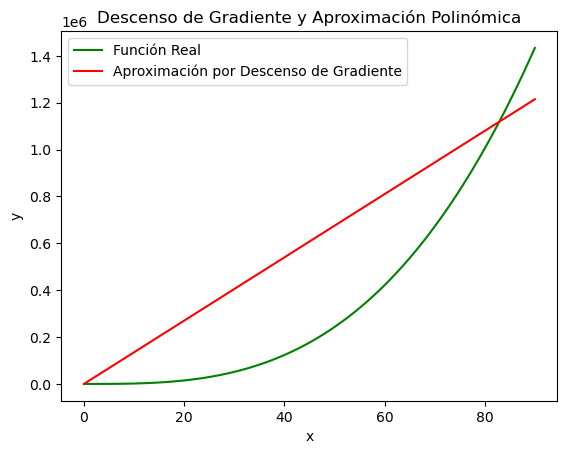

In [124]:
plt.plot(x_real, y_real, label='Función Real', color='green')
plt.scatter(X[:, 1], Y, color='blue', label='Puntos de Muestra Real')
plt.plot(x_approximated, y_approximated, color='red', label='Aproximación por Descenso de Gradiente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente y Aproximación Polinómica')
plt.show()

A través del descenso de gradiente, hemos mejorado la aproximación de nuestro modelo polinómico de tercer grado a los datos reales. Aunque el costo final es elevado, la visualización revela una mejor alineación entre la curva real y la aproximación del modelo. Experimentaremos con más ajustes de hiperparámetros para mejorar aún más la convergencia y el ajuste del modelo. 

Descenso de gradiente estocástico

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivative_polynomial_function(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) / 2

def stochastic_gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    costs = []

    start_time = time.time()  # Guardar tiempo de inicio
    for i in range(num_iterations):
        current_x = x_values[-1]
        gradient = derivative_polynomial_function(current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)

        y_pred = polynomial_function(new_x)
        cost = cost_function(polynomial_function(current_x), y_pred)
        costs.append(cost)
        
        print("Iteración {}: Costo {}".format(i + 1, cost))

    end_time = time.time()
    execution_time = end_time - start_time  
    print("Tiempo de ejecución:", execution_time, "segundos")

    return np.array(x_values), np.array(costs)

initial_guess = 0.0
learning_rate = 0.0001
num_iterations = 500

x_values, costs = stochastic_gradient_descent(initial_guess, learning_rate, num_iterations)
y_values_approximated = polynomial_function(x_values)

Iteración 1: Costo 3.126875906437157e-06
Iteración 2: Costo 3.1343928048254164e-06
Iteración 3: Costo 3.141935313070638e-06
Iteración 4: Costo 3.1495035335803375e-06
Iteración 5: Costo 3.157097569231694e-06
Iteración 6: Costo 3.1647175233723643e-06
Iteración 7: Costo 3.172363499833595e-06
Iteración 8: Costo 3.180035602922154e-06
Iteración 9: Costo 3.1877339374245255e-06
Iteración 10: Costo 3.1954586086156218e-06
Iteración 11: Costo 3.2032097222551903e-06
Iteración 12: Costo 3.210987384593187e-06
Iteración 13: Costo 3.2187917023684286e-06
Iteración 14: Costo 3.2266227828173758e-06
Iteración 15: Costo 3.2344807336728127e-06
Iteración 16: Costo 3.242365663164771e-06
Iteración 17: Costo 3.2502776800293814e-06
Iteración 18: Costo 3.2582168935030446e-06
Iteración 19: Costo 3.2661834133301743e-06
Iteración 20: Costo 3.2741773497698545e-06
Iteración 21: Costo 3.2821988135866105e-06
Iteración 22: Costo 3.2902479160673053e-06
Iteración 23: Costo 3.2983247690096407e-06
Iteración 24: Costo 3.30642

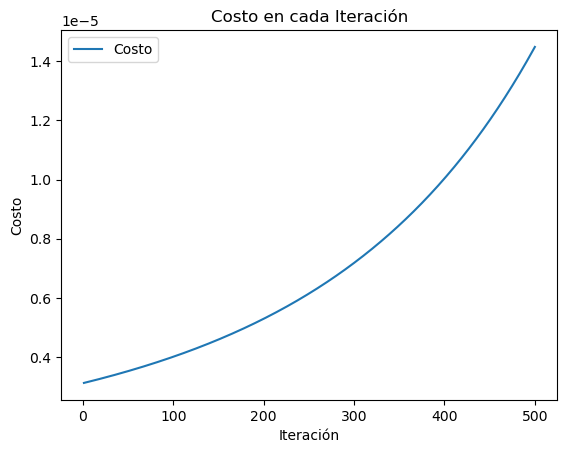

In [214]:
plt.plot(range(1, num_iterations + 1), costs, label='Costo')
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.legend()
plt.title('Costo en cada Iteración')
plt.show()

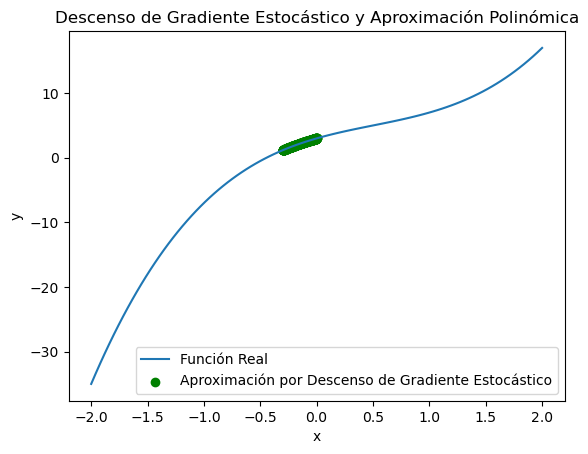

In [215]:
plt.plot(x_real, y_real, label='Función Real')
plt.scatter(x_values, y_values_approximated, color='green', label='Aproximación por Descenso de Gradiente Estocástico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente Estocástico y Aproximación Polinómica')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivative_polynomial_function(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)
                      
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) / 2


def mini_batch_gradient_descent(X, Y, theta, alpha, num_epochs, batch_size):
    m = len(Y)
    costs = []
    start_time = time.time()  
    for epoch in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            gradient = np.dot(X_batch.T, np.dot(X_batch, theta) - Y_batch) / len(Y_batch)
            theta -= alpha * gradient
        
    
        Y_pred = np.dot(X, theta)
        cost = cost_function(Y, Y_pred)
        costs.append(cost)
        
        print("Epoch {}: Costo {}".format(epoch + 1, cost))
        
    end_time = time.time() 
    execution_time = end_time - start_time  
    print("Tiempo de ejecución:", execution_time, "segundos")
        
    return theta, costs


np.random.seed(42)
X_train = np.random.rand(100, 1) * 10
Y_train = polynomial_function(X_train) + np.random.randn(100, 1) * 5


X_train_b = np.c_[np.ones((100, 1)), X_train]


theta = np.random.randn(2, 1)


learning_rate = 0.001
num_epochs = 100
batch_size = 10

theta_final, costs = mini_batch_gradient_descent(X_train_b, Y_train, theta, learning_rate, num_epochs, batch_size)

Epoch 1: Costo 116004.3695611613
Epoch 2: Costo 77364.03597383444
Epoch 3: Costo 57079.51316822792
Epoch 4: Costo 46190.350743889285
Epoch 5: Costo 40310.836095911625
Epoch 6: Costo 37161.316196810134
Epoch 7: Costo 35480.931974446576
Epoch 8: Costo 34571.251598566014
Epoch 9: Costo 34090.88682863075
Epoch 10: Costo 33778.925956678286
Epoch 11: Costo 33596.095903606925
Epoch 12: Costo 33487.346037278396
Epoch 13: Costo 33385.07987899743
Epoch 14: Costo 33284.80775214292
Epoch 15: Costo 33201.00427904321
Epoch 16: Costo 33127.592401579954
Epoch 17: Costo 33053.830869040896
Epoch 18: Costo 32983.13011556179
Epoch 19: Costo 32912.14124719318
Epoch 20: Costo 32841.98933947437
Epoch 21: Costo 32772.4121003084
Epoch 22: Costo 32703.14788542492
Epoch 23: Costo 32634.288599783777
Epoch 24: Costo 32565.83926767981
Epoch 25: Costo 32498.995000920597
Epoch 26: Costo 32430.082196621257
Epoch 27: Costo 32363.58477146257
Epoch 28: Costo 32296.37124097707
Epoch 29: Costo 32230.104850713746
Epoch 30: 

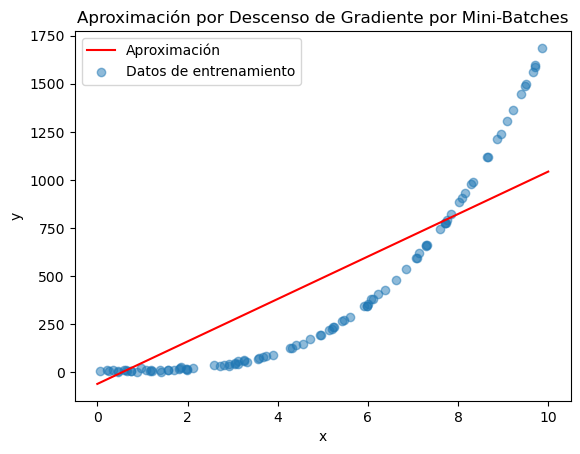

In [7]:
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]
Y_new = X_new_b.dot(theta_final)

plt.plot(X_new, Y_new, "r-", label="Aproximación")
plt.scatter(X_train, Y_train, alpha=0.5, label="Datos de entrenamiento")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Aproximación por Descenso de Gradiente por Mini-Batches")
plt.show()

El SGD actualiza los parámetros utilizando un solo ejemplo de datos a la vez, lo que puede llevar a actualizaciones más frecuentes y, por lo tanto, a una convergencia más rápida, especialmente en conjuntos de datos grandes, por lo cual se entiende porque fue el más rápido de los tres

Referencias: https://pythonguia.com/scikit-aprender-descenso-de-gradiente/